In [1]:
!pip install mxnet
!pip install gluoncv

     |████████████████████████████████| 46.9MB 91kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 1.1MB 3.8MB/s 
     |████████████████████████████████| 14.1MB 306kB/s 
     |████████████████████████████████| 122kB 52.4MB/s 
     |████████████████████████████████| 337kB 41.4MB/s 
     |████████████████████████████████| 215kB 48.2MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
     |████████████████████████████████| 952kB 40.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 716kB 39.9MB/s 
     |████████████████████████████████| 133kB 34.2MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 28.2MB/s 
     |████████████████████████████████| 962kB 34.1MB/s 
     |████████████████

In [2]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt


In [3]:
image=mx.image.imread('cat.png')

In [4]:
from mxnet.gluon.data.vision import transforms

In [6]:
transform_fn=transforms.Compose([transforms.ToTensor()])

In [7]:
image=transform_fn(image)

In [8]:
image.shape

(3, 733, 490)

In [9]:
image.dtype

numpy.float32

In [10]:
image=image.expand_dims(0)
print(image.shape)

(1, 3, 733, 490)


In [11]:
network=gcv.model_zoo.get_model('fcn_resnet50_ade',pretrained=True)

57418KB [00:01, 36382.28KB/s]                           


128832KB [00:02, 45054.36KB/s]                            


In [12]:
output=network.demo(image)

/usr/local/lib/python3.7/dist-packages/gluoncv/model_zoo/segbase.py:107: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [13]:
output.shape

(1, 150, 733, 490)

In [15]:
output=output[0]

In [17]:
output.shape

(150, 733, 490)

In [20]:
px_height,px_width=300,100

In [21]:
px_logit=output[:,px_height,px_width]

In [24]:
px_probability=mx.nd.softmax(px_logit)
px_rounded_probability=mx.nd.round(px_probability*100)/100
print(px_rounded_probability)


[0.05 0.01 0.   0.01 0.   0.   0.   0.18 0.   0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.02 0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.03 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.39 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.
 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.01 0.01 0.   0.   0.
 0.01 0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [26]:
class_index=mx.nd.argmax(px_logit,axis=0)
class_index=class_index[0].astype('int').asscalar()
print(class_index)

81


In [29]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation
class_label=ADE20KSegmentation.CLASSES[class_index]
print(class_label)

towel


In [30]:
output_proba=mx.nd.softmax(output,axis=0)

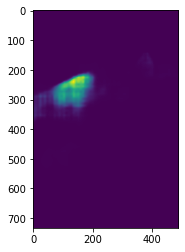

In [31]:
output_heatmap=output_proba[81]
plt.imshow(output_heatmap.asnumpy())

In [32]:
prediction=mx.nd.argmax(output,0).asnumpy()
print(prediction.shape)

(733, 490)


In [33]:
print(prediction)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [7. 7. 7. ... 3. 0. 0.]
 [7. 7. 7. ... 3. 3. 0.]
 [7. 7. 7. ... 3. 3. 3.]]


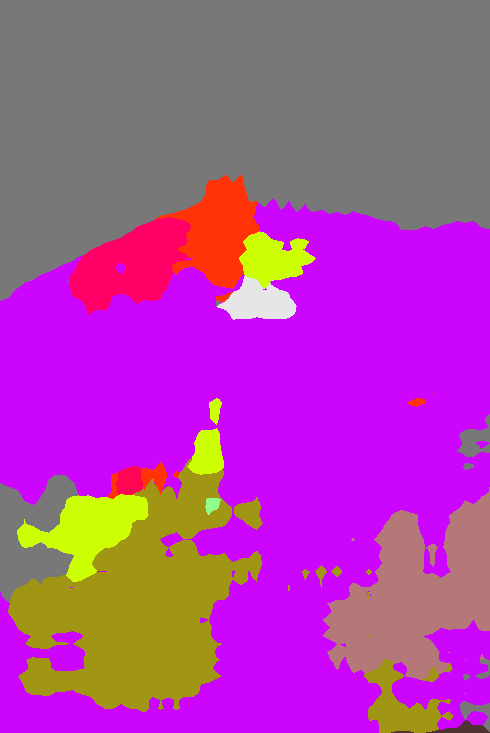

In [35]:
from gluoncv.utils.viz import get_color_pallete
prediction_image=get_color_pallete(prediction,'ade20k')
prediction_image